In [1]:
import pandas as pd
from ast import literal_eval
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("vgg_n.csv")

In [2]:
df.columns

Index(['accuracy', 'activation', 'dataset', 'dropout_rate', 'epochs',
       'input_dims', 'loss', 'lr_rate', 'model_name', 'test_accuracy',
       'test_loss', 'val_accuracy', 'val_loss', 'opt'],
      dtype='object')

In [3]:
def literal_return(val):
    try:
        return literal_eval(val)
    except (ValueError, SyntaxError) as e:
        return val

In [4]:
for col in list(df.columns):
    df[col] = df.apply(lambda x: literal_return(str(x[col])),axis=1)

In [5]:
# df[0:3][:,J]
d_opt = df[['accuracy','val_accuracy','loss','opt','test_accuracy']][0:6]
d_opt

,accuracy,val_accuracy,loss,opt,test_accuracy
0,"[0.49962687, 0.9720895, 0.9841791, 0.9889055, ...","[0.9598990082740784, 0.9691919088363647, 0.985...","[1.402208507883395, 0.09357348736690645, 0.053...",sgd,0.9951
1,"[0.09793533, 0.0979602, 0.0979602, 0.0979602, ...","[0.10000000149011612, 0.10000000149011612, 0.1...","[14.502014120680776, 14.539163346171971, 14.53...",adam,0.0958
2,"[0.10166667, 0.10189055, 0.10189055, 0.1018905...","[0.10277777910232544, 0.10277777910232544, 0.1...","[14.440315297444661, 14.475813645699724, 14.47...",adagrad,0.1010
3,"[0.17337313, 0.34779105, 0.4544776, 0.5358806,...","[0.27218180894851685, 0.4153939485549927, 0.49...","[2.1972184184914205, 1.7556254367401352, 1.483...",sgd,0.7213
4,"[0.09859701, 0.09877612, 0.09877612, 0.0987761...","[0.10248485207557678, 0.10248485207557678, 0.1...","[14.481889267651002, 14.5260122756958, 14.5260...",adam,0.1000
5,"[0.098656714, 0.098985076, 0.09877612, 0.09850...","[0.10248485207557678, 0.10248485207557678, 0.1...","[14.480491255802894, 14.522644347916788, 14.52...",adagrad,0.1000


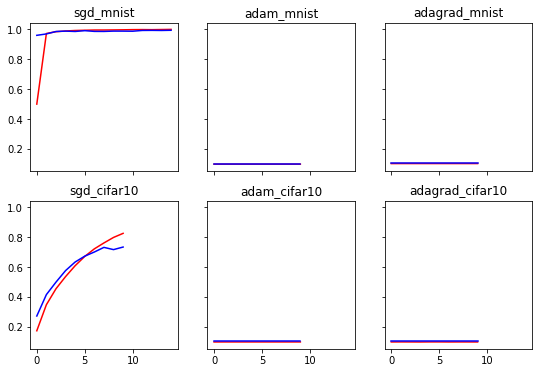

In [6]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(9,6))
ax1.set_title('sgd_mnist')
ax1.plot(d_opt['accuracy'][0] ,'r')
ax1.plot(d_opt['val_accuracy'][0] ,'b')
# ax1.plot(d_opt['loss'][0], 'g' )

ax2.set_title('adam_mnist')
ax2.plot(d_opt['accuracy'][1],'r')
ax2.plot(d_opt['val_accuracy'][1] ,'b')
# ax2.plot(d_opt['loss'][1] ,'g')

ax3.set_title('adagrad_mnist')
ax3.plot(d_opt['accuracy'][2] , 'r')
ax3.plot(d_opt['val_accuracy'][2] ,'b')
# ax3.plot(d_opt['loss'][2] ,'g')

ax4.set_title('sgd_cifar10')
ax4.plot(d_opt['accuracy'][3] ,'r')
ax4.plot(d_opt['val_accuracy'][3] ,'b')
# ax4.plot(d_opt['loss'][3] ,'g')

ax5.set_title('adam_cifar10')
ax5.plot(d_opt['accuracy'][4] ,'r')
ax5.plot(d_opt['val_accuracy'][4] ,'b')
# ax5.plot(d_opt['loss'][4] ,'g')

ax6.set_title('adagrad_cifar10')
ax6.plot(d_opt['accuracy'][5] ,'r')
ax6.plot(d_opt['val_accuracy'][5] ,'b')
# ax6.plot(d_opt['loss'][5] ,'g')
plt.show()

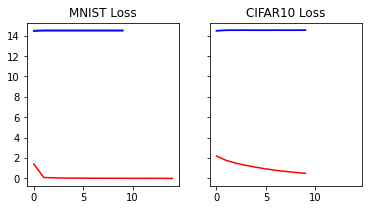

In [7]:
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True,figsize=(6,3))
ax1.set_title('MNIST Loss')
ax1.plot(d_opt['loss'][0],'r') # sgd
ax1.plot(d_opt['loss'][1],'g') # adam
ax1.plot(d_opt['loss'][2],'b') # adagrad
ax2.set_title('CIFAR10 Loss') 
ax2.plot(d_opt['loss'][3],'r')  # sgd
ax2.plot(d_opt['loss'][4],'g') #adam
ax2.plot(d_opt['loss'][5],'b') # adagrad
plt.show()

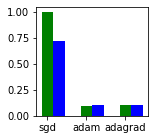

In [8]:
fig, ((ax1)) = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True,figsize=(2,2))
width = 0.3
ind= np.arange(len(d_opt[['opt']])/2)
ax1.bar(ind, list(d_opt['test_accuracy'].values)[0:3],width,color='g')
ax1.bar(ind + width, list(d_opt['test_accuracy'].values)[3:6],width,color='b')
ax1.set_xticks(ind)
ax1.set_xticklabels(list(d_opt['opt'].values))
plt.show()

,opt,dataset,lr_rate,test_accuracy
7,sgd,cifar10,0.0001,0.4935
6,sgd,cifar10,0.0010,0.6647
3,sgd,cifar10,0.0100,0.7213
8,sgd,cifar10,0.1000,0.1000
9,sgd,cifar10,0.5000,0.1000


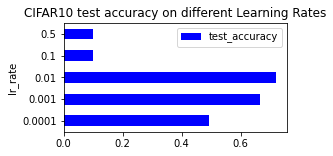

In [11]:
frames = [df[['opt','dataset','lr_rate','test_accuracy']][3:4],df[['opt','dataset','lr_rate','test_accuracy']][6:10]]
df_lr_rate = pd.concat(frames,ignore_index=False)#.reset_index(drop=True)
df_lr_rate = df_lr_rate.sort_values(by=['lr_rate'])
ax = df_lr_rate.plot.barh(x='lr_rate', y='test_accuracy',figsize=(4,2),color='b',title='CIFAR10 test accuracy on different Learning Rates')
df_lr_rate

,opt,dataset,activation,test_accuracy
10,sgd,cifar10,relu,0.1000
11,sgd,cifar10,tanh,0.1000
12,sgd,cifar10,sigmoid,0.7130
0,sgd,mnist,softmax,0.9951


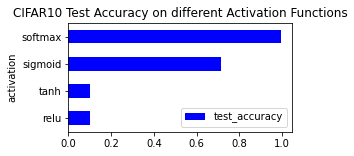

In [17]:
frames = [df[['opt','dataset','activation','test_accuracy']][0:1],df[['opt','dataset','activation','test_accuracy']][10:13]]
d_act_rate = pd.concat(frames,ignore_index=False)#.reset_index(drop=True)
d_act_rate = d_act_rate.sort_values(by=['test_accuracy'])
ax = d_act_rate.plot.barh(x='activation', y='test_accuracy',figsize=(4,2),color='b',title='CIFAR10 Test Accuracy on different Activation Functions')
d_act_rate

,opt,dataset,dropout_rate,test_accuracy
13,sgd,cifar10,0.1,0.7061
3,sgd,cifar10,0.2,0.7213
14,sgd,cifar10,0.5,0.7372
15,sgd,cifar10,0.9,0.6904


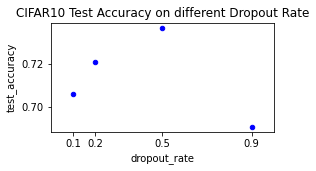

In [16]:
frames = [df[['opt','dataset','dropout_rate','test_accuracy']][3:4],df[['opt','dataset','dropout_rate','test_accuracy']][13:16]]
d_drp_rate = pd.concat(frames,ignore_index=False)#.reset_index(drop=True)
d_drp_rate = d_drp_rate.sort_values(by=['dropout_rate'])
list(d_drp_rate['dropout_rate'].values)
ax = d_drp_rate.plot.scatter(x='dropout_rate', y='test_accuracy',figsize=(4,2),color='b',xticks=list(d_drp_rate['dropout_rate'].values),xlim=[0,1],title='CIFAR10 Test Accuracy on different Dropout Rate')
d_drp_rate

In [7]:
vector_cols = ['accuracy', 'val_accuracy', 'val_loss', 'loss']

In [8]:
for col in vector_cols:
    df[col] = df.apply(lambda x: x[col][-1],axis=1)

In [10]:
df[['model_name','activation','dataset','dropout_rate' ,'epochs','input_dims','lr_rate', 'opt','accuracy','val_accuracy','loss','test_accuracy','test_loss']]

,model_name,activation,dataset,dropout_rate,epochs,input_dims,lr_rate,opt,accuracy,val_accuracy,loss,test_accuracy,test_loss
0,VGG16,softmax,mnist,0.2,15.0,"(224, 224, 3)",0.0100,sgd,0.999702,0.993687,1.088761e-03,0.9951,2.224292e-02
1,VGG16,softmax,mnist,0.2,10.0,"(224, 224, 3)",0.0100,adam,0.097960,0.100000,1.453916e+01,0.0958,1.457398e+01
2,VGG16,softmax,mnist,0.2,10.0,"(224, 224, 3)",0.0100,adagrad,0.101891,0.102778,1.447581e+01,0.1010,1.449017e+01
3,VGG16,softmax,cifar10,0.2,10.0,"(224, 224, 3)",0.0100,sgd,0.825284,0.733697,4.982573e-01,0.7213,8.661988e-01
4,VGG16,softmax,cifar10,0.2,10.0,"(224, 224, 3)",0.0100,adam,0.098776,0.102485,1.452601e+01,0.1000,1.450629e+01
5,VGG16,softmax,cifar10,0.2,10.0,"(224, 224, 3)",0.0100,adagrad,0.098567,0.102485,1.452938e+01,0.1000,1.450629e+01
6,VGG16,softmax,cifar10,0.2,10.0,"(224, 224, 3)",0.0010,sgd,0.727194,0.666061,7.761270e-01,0.6647,9.896639e-01
7,VGG16,softmax,cifar10,0.2,10.0,"(224, 224, 3)",0.0001,sgd,0.472657,0.493212,1.477908e+00,0.4935,1.420535e+00
8,VGG16,softmax,cifar10,0.2,10.0,"(224, 224, 3)",0.1000,sgd,0.103552,0.095879,2.304036e+00,0.1000,2.303477e+00
9,VGG16,softmax,cifar10,0.2,10.0,"(224, 224, 3)",0.5000,sgd,0.098896,0.100727,1.452409e+01,0.1000,1.450629e+01
